## Challenge: Build a regression model 

Predict property crimes. The goal here is prediction rather than understanding mechanisms, so the focus is on creating a model that explains a lot of variance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv", header=4)

In [3]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0.0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,"2,577",3,0.0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,"2,846",3,0.0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,"97,956",791,8.0,NaN,30,227,526,"4,090",705,"3,243",142,NaN
4,Albion Village,"6,388",23,0.0,NaN,3,4,16,223,53,165,5,NaN


## Data cleaning

In [4]:
df.Population = pd.to_numeric(df.Population.str.replace(',', ''))

In [5]:
df["Population^2"] = df.Population*df.Population

In [6]:
murder=df.iloc[:, 3:4]
df['Murder'] = murder

In [7]:
df[df.Murder > 1.0] = 1.0

In [8]:
df.Robbery = pd.to_numeric(df.Robbery)
df[df.Robbery > 1] = 1

In [9]:
df = df.rename(columns={'Violent\ncrime':'Violent', 'Murder and\nnonnegligent\nmanslaughter':'Murder', 
                   'Rape\n(revised\ndefinition)1':'Rape1', 'Rape\n(legacy\ndefinition)2':'Rape2',
                   'Aggravated\nassault':'Assault', 'Property\ncrime':'PropertyCrime',
                   'Larceny-\ntheft':'LarcenyTheft', 'Motor\nvehicle\ntheft':'VehicleTheft'})

In [10]:
df.Rape1 = df.Rape1.fillna(0)

In [11]:
pd.options.display.max_colwidth=500

In [12]:
df.iloc[348:, 0:1]

,City
348,1 The figures shown in this column for the offense of rape were reported using the revised Uniform Crime Reporting (UCR) definition of rape. See Data Declaration for further explanation.
349,2 The figures shown in this column for the offense of rape were reported using the legacy UCR definition of rape. See Data Declaration for further explanation.
350,3 The FBI does not publish arson data unless it receives data from either the agency or the state for all 12 months of the calendar year.


In [13]:
df.drop(df.index[348:], inplace=True)

In [14]:
df

,City,Population,Violent,Murder,Rape1,Rape2,Robbery,Assault,PropertyCrime,Burglary,LarcenyTheft,VehicleTheft,Arson3,Population^2,Murder
0,Adams Village,1861.0,0,0.0,0.0,0,0.0,0,12,2,10,0,0.0,3463321.0,0.0
1,Addison Town and Village,2577.0,3,0.0,0.0,0,0.0,3,24,3,20,1,0.0,6640929.0,0.0
2,Akron Village,2846.0,3,0.0,0.0,0,0.0,3,16,1,15,0,0.0,8099716.0,0.0
3,1,1.0,1,1.0,1.0,1,1.0,1,1,1,1,1,1.0,1.0,1.0
4,1,1.0,1,1.0,1.0,1,1.0,1,1,1,1,1,1.0,1.0,1.0
5,1,1.0,1,1.0,1.0,1,1.0,1,1,1,1,1,1.0,1.0,1.0
6,Allegany Village,1781.0,3,0.0,0.0,0,0.0,3,10,0,10,0,0.0,3171961.0,0.0
7,1,1.0,1,1.0,1.0,1,1.0,1,1,1,1,1,1.0,1.0,1.0
8,1,1.0,1,1.0,1.0,1,1.0,1,1,1,1,1,1.0,1.0,1.0
9,1,1.0,1,1.0,1.0,1,1.0,1,1,1,1,1,1.0,1.0,1.0


In [15]:
# fill in missing values for Arson with 0
df.Arson3 = df.Arson3.fillna(0)

In [16]:
df.dtypes

City              object
Population       float64
Violent           object
Murder           float64
Rape1            float64
Rape2             object
Robbery          float64
Assault           object
PropertyCrime     object
Burglary          object
LarcenyTheft      object
VehicleTheft      object
Arson3           float64
Population^2     float64
Murder           float64
dtype: object

In [17]:
# had an issue looping.. fixed now, can make this more elegant later
df['Violent'] = pd.to_numeric(df['Violent'])
df['Assault'] = pd.to_numeric(df['Assault'])
df['PropertyCrime'] = pd.to_numeric(df['PropertyCrime'])
df['Burglary'] = pd.to_numeric(df['Burglary'])
df['LarcenyTheft'] = pd.to_numeric(df['LarcenyTheft'])
df['VehicleTheft'] = pd.to_numeric(df['VehicleTheft'])
df['Rape2'] = pd.to_numeric(df['Rape2'])

## Modeling variance

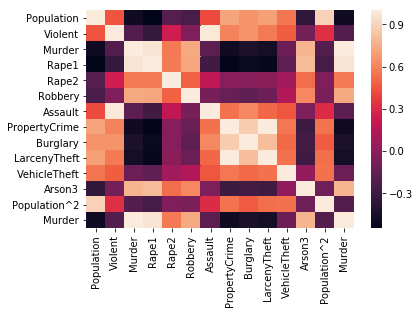

In [18]:
sns.heatmap(df.corr())

In [19]:
df.corr()

,Population,Violent,Murder,Rape1,Rape2,Robbery,Assault,PropertyCrime,Burglary,LarcenyTheft,VehicleTheft,Arson3,Population^2,Murder
Population,1.000000,0.450139,-0.482776,-0.546157,-0.204452,-0.245504,0.416834,0.716729,0.661161,0.699003,0.554960,-0.341329,0.895958,-0.482776
Violent,0.450139,1.000000,-0.210276,-0.318946,0.242024,-0.047152,0.987068,0.600613,0.656637,0.569472,0.476375,-0.092908,0.328283,-0.210276
Murder,-0.482776,-0.210276,1.000000,0.965741,0.566234,0.736223,-0.175559,-0.481849,-0.434372,-0.467555,-0.119390,0.776591,-0.210857,1.000000
Rape1,-0.546157,-0.318946,0.965741,1.000000,0.572961,0.722375,-0.278229,-0.536956,-0.503063,-0.518140,-0.164598,0.809724,-0.263956,0.965741
Rape2,-0.204452,0.242024,0.566234,0.572961,1.000000,0.490509,0.185133,-0.017244,-0.022342,-0.007451,0.071274,0.524582,-0.050246,0.566234
Robbery,-0.245504,-0.047152,0.736223,0.722375,0.490509,1.000000,-0.080491,-0.132949,-0.160937,-0.117664,0.135566,0.617618,-0.064425,0.736223
Assault,0.416834,0.987068,-0.175559,-0.278229,0.185133,-0.080491,1.000000,0.540653,0.616583,0.507482,0.453426,-0.053220,0.306956,-0.175559
PropertyCrime,0.716729,0.600613,-0.481849,-0.536956,-0.017244,-0.132949,0.540653,1.000000,0.867509,0.995346,0.563958,-0.298710,0.543426,-0.481849
Burglary,0.661161,0.656637,-0.434372,-0.503063,-0.022342,-0.160937,0.616583,0.867509,1.000000,0.817191,0.515998,-0.270096,0.473820,-0.434372
LarcenyTheft,0.699003,0.569472,-0.467555,-0.518140,-0.007451,-0.117664,0.507482,0.995346,0.817191,1.000000,0.540051,-0.288332,0.534475,-0.467555
